In [1]:
import numpy as np

# Generates the problem
A = np.array([[1, 1, 1], [2, 1, 2], [0, 0, 1]])
y = np.array([0, 1, 0])

# Solve the system
x_sol = np.linalg.solve(A, y)
print(f"The solution is {x_sol}.")

The solution is [ 1. -1.  0.].


In [2]:
import numpy as np

# Setting up the dimension
n = 15

# Creating the test problem (with a Random matrix)
A = np.random.randn(n, n) # n x n random matrix
x_true = np.ones((n, ))   # n-dimensional vector of ones

y = A @ x_true # Compute the term y s.t. x_true is a sol.

# Solving the system with numpy
x_sol = np.linalg.solve(A, y)

# Computing the accuracy
E_rel = np.linalg.norm(x_true - x_sol, 2) / np.linalg.norm(x_true, 2)
print(f"The relative error is {E_rel}")

The relative error is 2.401787357704591e-13


In [3]:
import numpy as np
import scipy
import scipy.linalg

# Setting up the dimension
n = 15

# Creating the test problem (with Hilbert matrix)
A = scipy.linalg.hilbert(n) # n x n hilbert matrix
x_true = np.ones((n, ))   # n-dimensional vector of ones

y = A @ x_true # Compute the term y s.t. x_true is a sol.

# Solving the system with numpy
x_sol = np.linalg.solve(A, y)

# Computing the accuracy
E_rel = np.linalg.norm(x_true - x_sol, 2) / np.linalg.norm(x_true, 2)
print(f"True solution: {x_true}.")
print(f"Computed solution: {x_sol}.")
print(f"The relative error is {E_rel}")

True solution: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.].
Computed solution: [ 0.99999995  1.00000807  0.99967264  1.00577502  0.94490775  1.31657382
 -0.15652389  3.72666552 -3.00357812  4.04053468  1.3253252  -2.17033528
  4.1161354  -0.39618677  1.25102602].
The relative error is 1.9326759080352935


In [4]:
import numpy as np
import scipy
import scipy.linalg

# Setting up the dimension
n = 15

# Creating the test problem (with Hilbert matrix)
A_random = np.random.randn(n, n) # n x n random matrix
A_hilbert = scipy.linalg.hilbert(n) # n x n hilbert matrix

print(f"Cond. Number Random matrix: {np.linalg.cond(A_random, p=2)}")
print(f"Cond. Number Hilbert matrix: {np.linalg.cond(A_hilbert, p=2)}")

Cond. Number Random matrix: 92.40538645301663
Cond. Number Hilbert matrix: 2.3228053763031325e+17


Condition number for n = 1: 1.0.
Condition number for n = 2: 19.281470067903967.
Condition number for n = 3: 524.0567775860627.
Condition number for n = 4: 15513.738738929662.
Condition number for n = 5: 476607.2502419222.
Condition number for n = 6: 14951058.641931808.
Condition number for n = 7: 475367356.51983196.
Condition number for n = 8: 15257576052.786306.
Condition number for n = 9: 493153909929.7127.
Condition number for n = 10: 16024897439077.97.
Condition number for n = 11: 521959222338558.8.
Condition number for n = 12: 1.6360718665566702e+16.


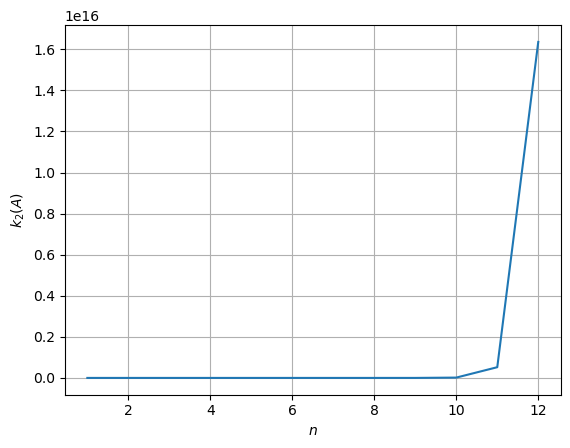

In [5]:
# We want to print out the condition number of the hilbert matrix A 
# for increasing dimension
n_max = 12

condition_numbers = np.zeros((n_max, ))
for n in range(1, n_max+1):
    # Define the hilbert matrix
    A = scipy.linalg.hilbert(n)

    # Compute the condition number
    cond = np.linalg.cond(A, p=2)

    # Print and save
    print(f"Condition number for n = {n}: {cond}.")
    condition_numbers[n-1] = cond # "n-1" because range begins by 1!

# Plot the condition number in semilogy plot
import matplotlib.pyplot as plt
plt.plot(np.arange(1, n_max+1), condition_numbers)
plt.grid()
plt.xlabel(r"$n$")
plt.ylabel(r"$k_2(A)$")
plt.show()

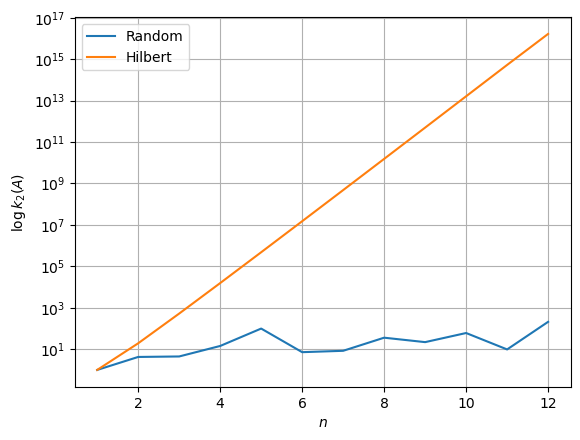

In [6]:
# We want to print out the condition number of the hilbert matrix vs random matrix
# for increasing dimension
n_max = 12

condition_numbers_rand = np.zeros((n_max, ))
condition_numbers_hilb = np.zeros((n_max, ))
for n in range(1, n_max+1):
    # Define the hilbert matrix
    A_rand = np.random.randn(n, n)
    A_hilb = scipy.linalg.hilbert(n)

    # Compute the condition number
    cond_rand = np.linalg.cond(A_rand, p=2)
    cond_hilb = np.linalg.cond(A_hilb, p=2)

    # Print and save
    condition_numbers_rand[n-1] = cond_rand # "n-1" because range begins by 1!
    condition_numbers_hilb[n-1] = cond_hilb # "n-1" because range begins by 1!

# Plot the condition number in semilogy plot
import matplotlib.pyplot as plt
plt.semilogy(np.arange(1, n_max+1), condition_numbers_rand)
plt.semilogy(np.arange(1, n_max+1), condition_numbers_hilb)
plt.grid()
plt.xlabel(r"$n$")
plt.ylabel(r"$\log k_2(A)$")
plt.legend(["Random", "Hilbert"])
plt.show()